In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\Users\COM\20190427\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
df=pd.read_csv("./machineLearningBasic/datasets/titanic.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.drop(['PassengerId',"Name","Ticket","Cabin"],axis=1,inplace=True)

In [9]:
mean_age=df['Age'].mean()

In [11]:
df['Age'].fillna(mean_age,inplace=True)

In [13]:
fill.na?

Object `fill.na` not found.


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
df=pd.get_dummies(df)

In [15]:
df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [16]:
y=df['Survived']

In [17]:
x=df.drop(['Survived'],axis=1)

In [52]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2)

In [53]:
clf=GradientBoostingClassifier()
clf.fit(xtr,ytr)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [54]:
y_pred=clf.predict(xte)

In [55]:
print("accuracy ={:.2f}".format(accuracy_score(yte,y_pred)))

accuracy =0.83


In [56]:
clf.feature_importances_

array([0.13623373, 0.12397274, 0.04653398, 0.00889781, 0.182745  ,
       0.18415819, 0.30728317, 0.00689309, 0.00093552, 0.00234677])

In [57]:
feat_imp=pd.DataFrame(clf.feature_importances_,index=x.columns,columns=["importance"])

In [58]:
feat_imp.sort_values(["importance"],ascending=False)

,importance
Sex_male,0.307283
Sex_female,0.184158
Fare,0.182745
Pclass,0.136234
Age,0.123973
SibSp,0.046534
Parch,0.008898
Embarked_C,0.006893
Embarked_S,0.002347
Embarked_Q,0.000936


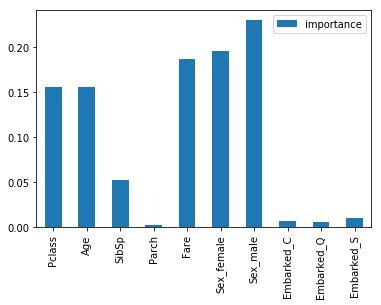

In [44]:
feat_imp.plot(kind='bar')